In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from copy import deepcopy
import math

df = pd.read_csv('data/mobile.csv', index_col=0)
print(len(df))
df.head()

400


,battery_power,clock_speed,four_g,int_memory,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range
0,1142,1.4,0,6,8,8,663,5,1,1,0
1,728,1.7,1,5,2,20,834,5,1,0,0
2,1868,0.5,1,40,8,17,298,17,1,0,0
3,890,2.2,0,44,8,13,751,3,0,0,0
4,1433,1.6,0,4,8,11,258,4,1,1,0


In [11]:
cols = ['battery_power', 'clock_speed', 'talk_time', 'pc', 'ram']

df_sub = df[cols]
df_sub.head()

,battery_power,clock_speed,talk_time,pc,ram
0,1142,1.4,5,8,663
1,728,1.7,5,20,834
2,1868,0.5,17,17,298
3,890,2.2,3,13,751
4,1433,1.6,4,11,258


## ranking standartization

In [12]:
diff = df_sub.max() - df_sub.min()
diff

battery_power    1495.0
clock_speed         2.5
talk_time          18.0
pc                 20.0
ram              3720.0
dtype: float64

In [40]:
df_norm = (df_sub - df_sub.min()).divide(diff)
df_norm.head()

,battery_power,clock_speed,talk_time,pc,ram
0,0.428094,0.36,0.166667,0.40,0.108871
1,0.151171,0.48,0.166667,1.00,0.154839
2,0.913712,0.00,0.833333,0.85,0.010753
3,0.259532,0.68,0.055556,0.65,0.132527
4,0.622742,0.44,0.111111,0.55,0.000000


In [41]:
data_scatter = df_norm.multiply(df_norm).values.sum()
data_scatter

649.7023812593757

In [42]:
z, mu, c = np.linalg.svd(df_norm)
mu

array([22.35103307,  6.72682019,  6.22889028,  5.84861932,  5.64607564])

In [43]:
z.shape, mu.shape, c.shape

((400, 400), (5,), (5, 5))

## Contribution of principal components:

In [17]:
np.multiply(mu.T, mu)

array([499.56867923,  45.25010981,  38.79907411,  34.20634796,
        31.87817014])

### in percent:

In [18]:
np.multiply(mu.T, mu) / data_scatter * 100

array([76.89192677,  6.96474434,  5.97182267,  5.26492575,  4.90658047])

## hidden factor

In [58]:
X = [[41, 66, 90], [57, 56, 60], [61, 72, 79], [69, 73, 72], [63, 52, 88], [62, 83, 80]]

In [64]:
a1, a2, a3 = np.linalg.svd(X)
a3

array([[-0.49479686, -0.56668802, -0.6588177 ],
       [ 0.58948477,  0.33815562, -0.73359286],
       [ 0.63850119, -0.75134244,  0.16673562]])

In [62]:
z, mu, c = np.linalg.svd(df_norm)
mu

array([22.35103307,  6.72682019,  6.22889028,  5.84861932,  5.64607564])

In [55]:
z = -z
c = -c
c[:,0]

array([ 0.45251698, -0.02746173,  0.42660185, -0.68034365, -0.38680436])

$$
Z = (0.453 * \text{batter_power} + 0.376 * \text{clock_speed} + 0.464 * \text{talk_time} + 0.477 * \text{pc} + 0.460 * \text{ram}) * \alpha
$$

$$
100 = (0.453 * 100 + 0.376 * 100 + 0.464 * 100 + 0.477 * 100 + 0.460 * 100) * \alpha 
$$

$$ 
\alpha = 0.448
$$


# Visualization

### range normalization

In [256]:
from matplotlib import pyplot as plt

cols = ['battery_power', 'clock_speed', 'talk_time', 'pc', 'ram']

df_sub = df[cols]
df_sub.head()

,battery_power,clock_speed,talk_time,pc,ram
0,1142,1.400,5,8,663
1,728,1.700,5,20,834
2,1868,0.500,17,17,298
3,890,2.200,3,13,751
4,1433,1.600,4,11,258


In [211]:
pd.options.display.float_format = '{:,.3f}'.format

In [212]:
means = df_sub.mean()
diff = df_sub.max() - df_sub.min()
df_range = (df_sub - means) / diff
df_range.head()

,battery_power,clock_speed,talk_time,pc,ram
0,-0.056,-0.045,-0.334,-0.112,-0.390
1,-0.333,0.075,-0.334,0.488,-0.344
2,0.429,-0.405,0.333,0.338,-0.488
3,-0.225,0.275,-0.445,0.138,-0.367
4,0.138,0.035,-0.389,0.038,-0.499


In [213]:
z, mu, c = np.linalg.svd(df_range)
mu

array([6.72838661, 6.2656009 , 6.03521067, 5.76435648, 5.60959808])

In [214]:
z1 = z[:,0] * np.sqrt(mu[0])
z2 = z[:,1] * np.sqrt(mu[1])

In [215]:
p=100*(mu[0] ** 2 + mu[1] ** 2) / df_range.multiply(df_range).values.sum()
print('contribution to the variance:', p)

contribution to the variance: 45.53180918692004


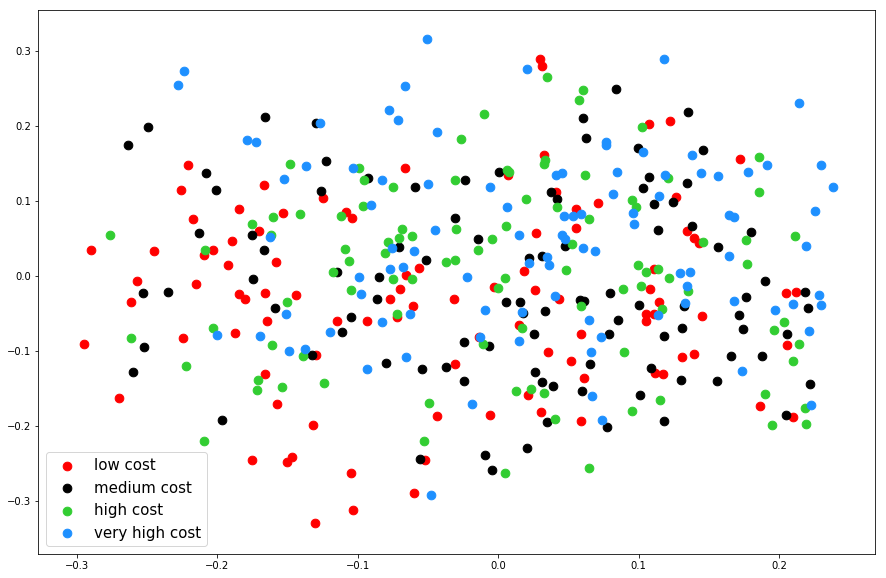

In [216]:
fig = plt.figure(figsize=(15,10))
colormap = ['red', 'black', 'limegreen', 'dodgerblue']
labels = ['low cost', 'medium cost', 'high cost', 'very high cost']
for i, (color, label) in enumerate(zip(colormap, labels)):
    plt.scatter(z1[i *100: i * 100+99], z2[i *100: i * 100+99], c=color, s=75, label=label)
plt.legend(fontsize=15)

In [182]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('pca_range_norm.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

### z-scoring

In [257]:
means = df_sub.mean()
std = df_sub.std()
df_z_scor = (df_sub - means) / std
df_z_scor.head()

,battery_power,clock_speed,talk_time,pc,ram
0,-0.188,-0.136,-1.071,-0.376,-1.371
1,-1.109,0.229,-1.071,1.638,-1.210
2,1.427,-1.231,1.068,1.135,-1.716
3,-0.748,0.838,-1.427,0.464,-1.288
4,0.460,0.108,-1.249,0.128,-1.754


In [272]:
z, mu, c = np.linalg.svd(df_z_scor)
mu

array([20.9806387 , 20.83717792, 19.9700579 , 19.07917192, 18.91578183])

In [259]:
z1 = z[:,0] * np.sqrt(mu[0]) # надо умножать на корень из синг значения
z2 = z[:,1] * np.sqrt(mu[1])

In [260]:
p=100*(mu[0] ** 2 + mu[1] ** 2) / df_z_scor.multiply(df_z_scor).values.sum()
print('contribution to the vatiance:', p)

contribution to the vatiance: 43.82833001870234


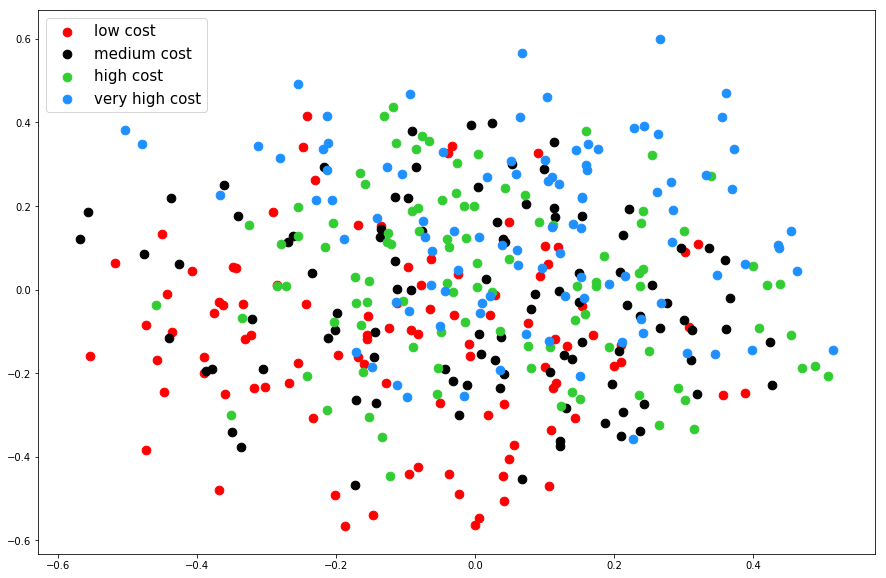

In [261]:
fig = plt.figure(figsize=(15,10))
colormap = ['red', 'black', 'limegreen', 'dodgerblue']
labels = ['low cost', 'medium cost', 'high cost', 'very high cost']
for i, (color, label) in enumerate(zip(colormap, labels)):
    plt.scatter(z1[i *100: i * 100+99], z2[i *100: i * 100+99], c=color, s=75, label=label)
plt.legend(fontsize=15)

In [194]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('pca_z_scoring.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

## conventional pca

In [262]:
from matplotlib import pyplot as plt

cols = ['battery_power', 'clock_speed', 'talk_time', 'pc', 'ram']

df_sub = df[cols]
df_sub.head()

,battery_power,clock_speed,talk_time,pc,ram
0,1142,1.400,5,8,663
1,728,1.700,5,20,834
2,1868,0.500,17,17,298
3,890,2.200,3,13,751
4,1433,1.600,4,11,258


In [263]:
means = df_sub.mean()
df_conv = (df_sub - means)
df_conv.head()

,battery_power,clock_speed,talk_time,pc,ram
0,-84.425,-0.112,-6.008,-2.238,"-1,452.015"
1,-498.425,0.188,-6.008,9.762,"-1,281.015"
2,641.575,-1.012,5.992,6.762,"-1,817.015"
3,-336.425,0.688,-8.008,2.762,"-1,364.015"
4,206.575,0.088,-7.008,0.762,"-1,857.015"


In [281]:
df_conv_np = np.array(df_conv).T @ np.array(df_conv)
cov = df_conv_np / 400
cov

array([[ 2.01564529e+05, -2.02713750e+00, -2.10731875e+01,
         2.14631563e+02, -5.16345138e+03],
       [-2.02713750e+00,  6.73067750e-01, -3.97086250e-01,
        -6.39812500e-02, -4.11299225e+01],
       [-2.10731875e+01, -3.97086250e-01,  3.13924437e+01,
        -1.08928125e+00,  4.40848875e+01],
       [ 2.14631563e+02, -6.39812500e-02, -1.08928125e+00,
         3.54160938e+01,  1.68166437e+02],
       [-5.16345137e+03, -4.11299225e+01,  4.40848875e+01,
         1.68166438e+02,  1.11834292e+06]])

In [282]:
eigvals, eigvecs = np.linalg.eig(cov)
eigvals

array([1.11837203e+06, 2.01535682e+05, 3.54447663e+01, 3.11095495e+01,
       6.66295067e-01])

In [283]:
pc1 = (np.array(df_conv) @ eigvecs[:,0].reshape(-1,1)) / np.sqrt(len(df_conv) * eigvals[0])
pc2 = (np.array(df_conv) @ eigvecs[:,1].reshape(-1,1)) / np.sqrt(len(df_conv) * eigvals[1])

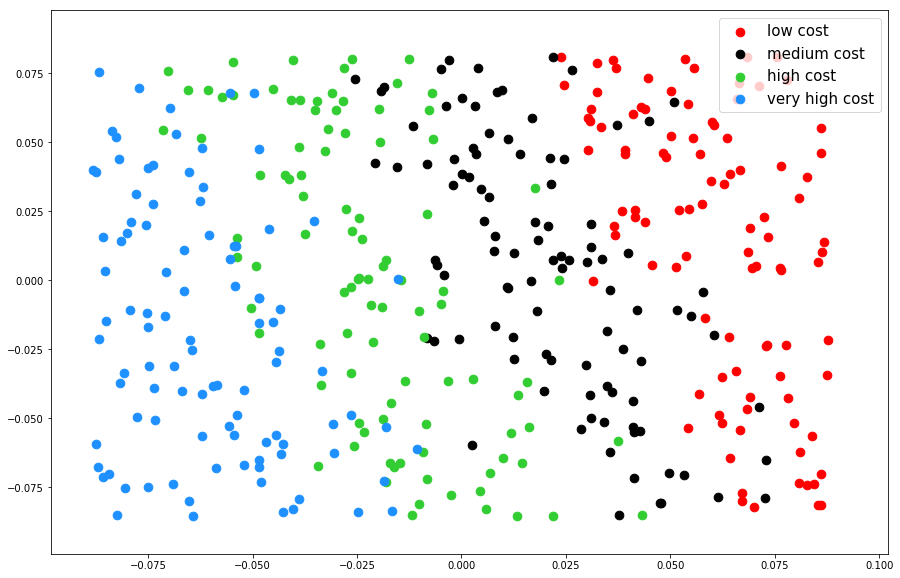

In [284]:
fig = plt.figure(figsize=(15,10))
colormap = ['red', 'black', 'limegreen', 'dodgerblue']
labels = ['low cost', 'medium cost', 'high cost', 'very high cost']
for i, (color, label) in enumerate(zip(colormap, labels)):
    plt.scatter(pc1[i *100: i * 100+99], pc2[i *100: i * 100+99], c=color, s=75, label=label)
plt.legend(fontsize=15)

In [285]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('pca_conv.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

In [287]:
np.sqrt(len(df_conv) * eigvals[0]), np.sqrt(len(df_conv) * eigvals[1])

(21150.62200947989, 8978.545131025532)

In [289]:
means = df_sub.mean()
std = df_sub.std()
df_z_scor = (df_sub - means) / std
df_z_scor.head()

,battery_power,clock_speed,talk_time,pc,ram
0,-0.188,-0.136,-1.071,-0.376,-1.371
1,-1.109,0.229,-1.071,1.638,-1.210
2,1.427,-1.231,1.068,1.135,-1.716
3,-0.748,0.838,-1.427,0.464,-1.288
4,0.460,0.108,-1.249,0.128,-1.754


In [290]:
z, mu, c = np.linalg.svd(df_z_scor)
mu

array([20.9806387 , 20.83717792, 19.9700579 , 19.07917192, 18.91578183])

In [288]:
mu[0], mu[1]

(21150.622009479892, 8978.545131025528)